# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.preprocessing import StandardScaler

In [2]:
iris=pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.shape

(150, 6)

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
iris.drop("Id",axis=1,inplace=True)

In [8]:
print(" The number of coulumns in given dataset is: ",iris.shape[1])
print("The target variable is Species:", iris.Species.unique())

 The number of coulumns in given dataset is:  5
The target variable is Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [9]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


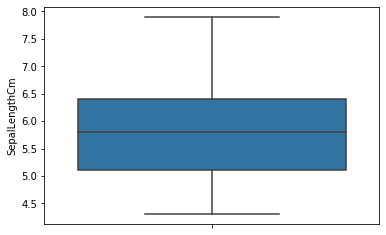

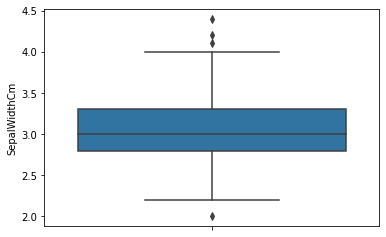

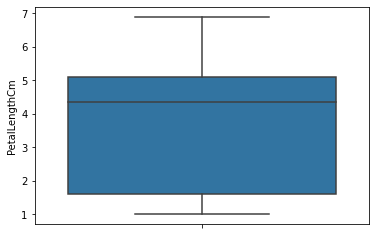

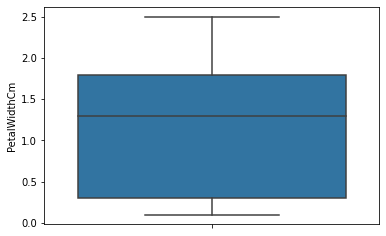

In [11]:
# finding outliers if any
cols = df.columns
for i in cols:
    sns.boxplot(y=df[i])
    plt.show()

From the above boxplot we can say that there are outliers in the column 'sepal width (cm)'

In [12]:
# removing outliers from 'sepal width (cm) column'
q1 = df['SepalWidthCm'].quantile(0.25)
q3 = df['SepalWidthCm'].quantile(0.75)
iqr = q3 - q1
df = df[(df['SepalWidthCm'] >= q1-1.5*iqr) & (df['SepalWidthCm'] <= q3+1.5*iqr)]
df.shape

(146, 4)

After outlier treatment the number of rows are reduced to 146 from 150

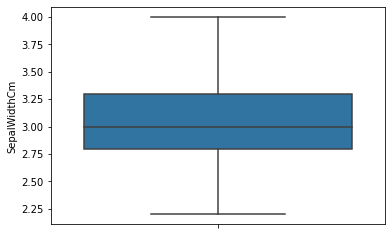

In [13]:
# Boxplot after removing outlier's  (sepal width (cm) column)
sns.boxplot(y=df['SepalWidthCm'])
plt.show()

In [14]:
# Standardizing
std_scaler = StandardScaler()
df_norm = std_scaler.fit_transform(df)

In [15]:
#To find no of clusters
cluster_rng = range(1,20)
cluster_errors = []

for a in cluster_rng:
    clusters = KMeans(a, n_init = 10)
    clusters.fit(df_norm)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
c_df = pd.DataFrame({'no_of_cluster': cluster_rng, 'cluster_errors': cluster_errors})
c_df[0:20]

,no_of_cluster,cluster_errors
0,1,584.000000
1,2,218.934500
2,3,135.398152
3,4,110.681388
4,5,89.380638
5,6,79.139986
6,7,68.981430
7,8,59.912320
8,9,52.987738
9,10,48.047396


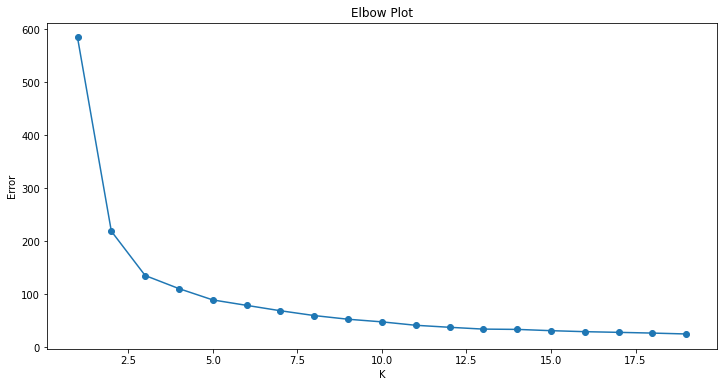

In [16]:
#Ploting elbow curve 
plt.figure(figsize=(12,6))
plt.plot(c_df.no_of_cluster, c_df.cluster_errors, marker = 'o') 
plt.xlabel('K') 
plt.ylabel('Error') 
plt.title('Elbow Plot') 
plt.show() 

From the above elbow curve we can say that '3' is the optimal number of cluster

In [17]:
# Creating object of the model and fitting it
model = KMeans(n_clusters=3, max_iter=50)
model.fit(df)

KMeans(max_iter=50, n_clusters=3)

In [18]:
#analysis of cluster found
df.index = pd.RangeIndex(len(df.index))
df_kmeans = pd.concat([df, pd.Series(model.labels_)], axis=1)
df_kmeans.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'ClusterID']

kmeans_clusters_Sepal_length = pd.DataFrame(df_kmeans.groupby(['ClusterID']).agg({'SepalLengthCm':'mean'}))
kmeans_clusters_Sepal_width = pd.DataFrame(df_kmeans.groupby(['ClusterID']).agg({'SepalWidthCm':'mean'}))
kmeans_clusters_Petal_length = pd.DataFrame(df_kmeans.groupby(['ClusterID']).agg({'PetalLengthCm':'mean'}))
kmeans_clusters_Petal_width = pd.DataFrame(df_kmeans.groupby(['ClusterID']).agg({'PetalWidthCm':'mean'}))

In [19]:
df2 = pd.concat([pd.Series([0,1,2]), kmeans_clusters_Sepal_length, kmeans_clusters_Sepal_width, kmeans_clusters_Petal_length, kmeans_clusters_Petal_width
                ], axis=1)
df2.columns = ['ClusterID','SepalLengthCm_mean','SepalWidthCm_mean','PetalLengthCm_mean',
               'PetalWidthCm_mean']
df2.head()

,ClusterID,SepalLengthCm_mean,SepalWidthCm_mean,PetalLengthCm_mean,PetalWidthCm_mean
0,0,5.916393,2.760656,4.408197,1.440984
1,1,4.976596,3.365957,1.463830,0.244681
2,2,6.850000,3.073684,5.742105,2.071053


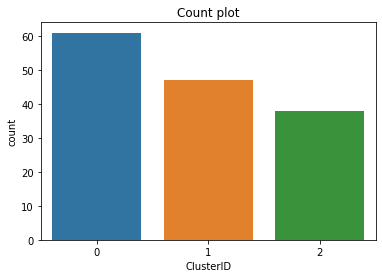

In [20]:
sns.countplot(x=df_kmeans.ClusterID)
plt.title('Count plot')
plt.show()

In [21]:
#heirarchical clustering with full dendrogram
plt.figure(figsize=(15,7))
mergings = linkage(df_kmeans, method = 'ward', metric='euclidean')


<Figure size 1080x504 with 0 Axes>

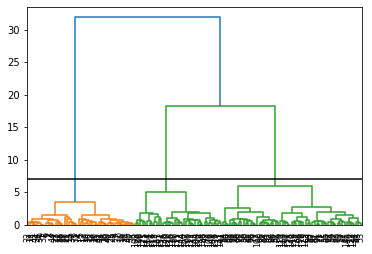

In [22]:
# set cut-off to 50
max_d = 7.08                # max_d as in max_distance
dendrogram(mergings,
           truncate_mode='lastp',  # show only the last p merged clusters
           p=150,                  # Try changing values of p
           leaf_rotation=90.,      # rotates the x axis labels
           leaf_font_size=8.,      # font size for the x axis labels
          )

plt.axhline(y=max_d, c='k')
plt.show()

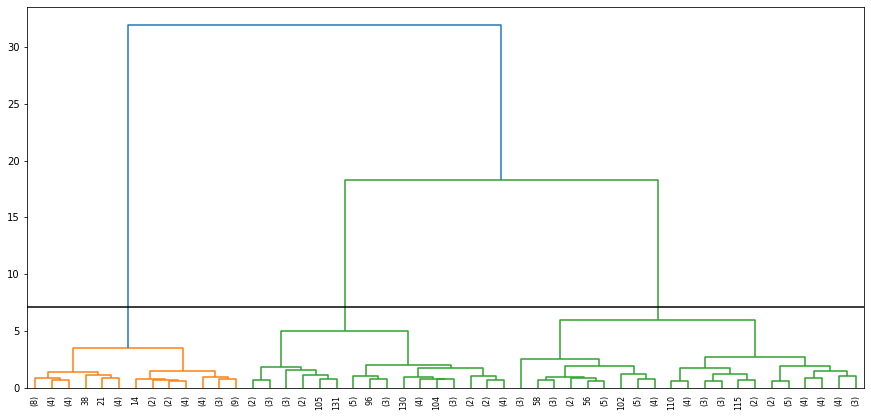

In [23]:
#heirarchical clustering with full dendrogram for 50
plt.figure(figsize=(15,7))
mergings = linkage(df_kmeans, method = 'ward', metric='euclidean')

# set cut-off to 50
max_d = 7.08                # max_d as in max_distance
dendrogram(mergings,
           truncate_mode='lastp',  # show only the last p merged clusters
           p=50,                  # Try changing values of p
           leaf_rotation=90.,      # rotates the x axis labels
           leaf_font_size=8.,      # font size for the x axis labels
          )

plt.axhline(y=max_d, c='k')
plt.show()

From the above two dendrogram we can say that there are three cluster

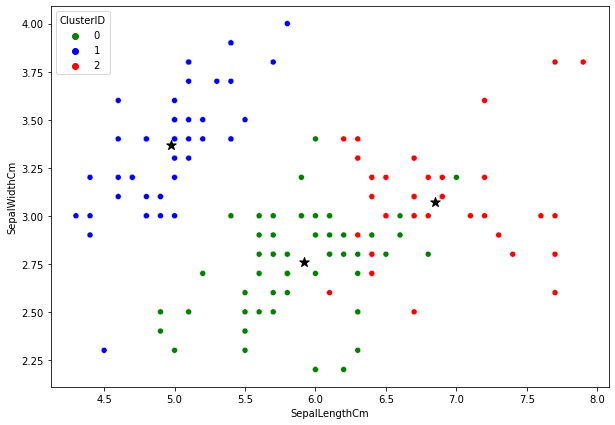

In [24]:
# Scatter plot to visualize the clusters
plt.figure(figsize=(10,7))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm', data=df_kmeans, hue='ClusterID', palette=['green','blue','red'])

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'black',marker="*" ,label = 'Centroids')
plt.show()